<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Basic Univariate Distributions in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)



### Basic Univariate Data Distribution Plotting in Python with GeostatsPy

Here's a simple workflow with some basic univariate statistics and distribution plotting of tabular (easily extended to gridded) data summary statistics and distributions. This should help you get started data visualization and interpretation.

#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data files to your working directory.  They are avaiable here:

1. Tabular data - sample_data.csv at https://git.io/fh4gm
2. Gridded data - AI_grid.csv at https://git.io/fh4gU

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import seaborn as sns                     # advanced plotting

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [3]:
os.chdir("c:/PGE383")             # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  For fun try misspelling the name. You will get an ugly, long error.  

In [4]:
df = pd.read_csv('sample_data_cow.csv')     # load our data table (wrong name!)

FileNotFoundError: [Errno 2] File sample_data_cow.csv does not exist: 'sample_data_cow.csv'

That's Python, but there's method to the madness. In general the error shows a trace from the initial command into all the nested programs involved until the actual error occured. If you are debugging code (I know, I'm getting ahead of myself now), this is valuable for the detective work of figuring out what went wrong. I've spent days in C++ debugging one issue, this helps. So since you're working in Jupyter Notebook, the program just assumes you code. Fine. If you scroll to the bottom of the error you often get a summary statement *FileNotFoundError: File b'sample_data_cow.csv' does not exist*. Ok, now you know that you don't have a file iwth that name in the working directory.  

Painful to leave that error in our workflow, eh? Everytime I passes it while making this documented I wanted to fix it. Its a coder thing... go ahead and erase it if you like. Just select the block and click on the scissors above in the top bar of this window. While we are at it, notice if you click the '+' you can add in a new block anywhere. Ok, let's spell the file name correctly and get back to work, already.

In [5]:
#df = pd.read_csv('sample_data.csv')     # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data.csv') # load data from Dr. Pyrcz's github repository

No error now! It worked, we loaded our file into our DataFrame called 'df'. But how do you really know that it worked? Visualizing the DataFrame would be useful and we already leard about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by printing a slice or by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the slice we could look at any subset of the data table and with the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [6]:
print(df.iloc[0:5,:])                   # display first 4 samples in the table as a preview
df.head(n=13)                           # we could also use this command for a table preview

       X      Y  Facies  Porosity       Perm           AI
0  100.0  900.0     1.0  0.100187   1.363890  5110.699751
1  100.0  800.0     0.0  0.107947  12.576845  4671.458560
2  100.0  700.0     0.0  0.085357   5.984520  6127.548006
3  100.0  600.0     0.0  0.108460   2.446678  5201.637996
4  100.0  500.0     0.0  0.102468   1.952264  3835.270322


,X,Y,Facies,Porosity,Perm,AI
0,100.0,900.0,1.0,0.100187,1.363890,5110.699751
1,100.0,800.0,0.0,0.107947,12.576845,4671.458560
2,100.0,700.0,0.0,0.085357,5.984520,6127.548006
3,100.0,600.0,0.0,0.108460,2.446678,5201.637996
4,100.0,500.0,0.0,0.102468,1.952264,3835.270322
5,100.0,400.0,0.0,0.110579,3.691908,5295.267191
6,100.0,300.0,0.0,0.088936,1.073582,6744.996106
7,100.0,200.0,0.0,0.102094,2.396189,5947.338115
8,100.0,100.0,1.0,0.137453,5.727603,5823.241783
9,200.0,900.0,1.0,0.137062,14.771314,5621.146994


#### Summary Univariate Statistics for Tabular Data

The table includes X and Y coordinates (meters), Facies 1 and 2 (1 is sandstone and 0 interbedded sand and mudstone), Porosity (fraction), permeability as Perm (mDarcy) and acoustic impedance as AI (kg/m2s*10^6). 

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe command provides count, mean, minimum, maximum, and quartiles all in a nice data table. We use transpose just to flip the table so that features are on the rows and the statistics are on the columns.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,261.0,629.823755,341.200403,40.000000,241.000000,700.000000,955.000000,1005.000000
Y,261.0,488.344828,166.669352,29.000000,416.000000,479.000000,539.000000,989.000000
Facies,261.0,0.620690,0.486148,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,261.0,0.150357,0.049783,0.058871,0.104893,0.137062,0.199108,0.242298
Perm,261.0,183.711554,344.959449,0.033611,2.186525,19.977020,246.215865,2642.999829
AI,261.0,4203.657220,1317.753146,1844.166880,2947.867713,4204.150893,5397.400218,7881.898531


We can also use a wide variety of statistical summaries built into NumPy's ndarrays.  When we use the command:
```p
df['Porosity']                       # returns an Pandas series
df['Porosity'].values                # returns an ndarray
```
Panda's DataFrame returns all the porosity data as a series and if we add 'values' it returns a NumPy ndarray and we have access to a lot of NumPy methods. I also like to use the round function to round the answer to a limited number of digits for accurate reporting of precision and ease of reading.

For example, now we could use commands. like this one:

In [8]:
print('The minimum is ' + str(round((df['Porosity'].values).min(),2)) + '.')
print('The maximum is ' + str(round((df['Porosity'].values).max(),2)) + '.')
print('The standard deviation is ' + str(round((df['Porosity'].values).std(),2)) + '.')
print('The standard deviation is ' + str(round((df['Porosity'].values).std(),2)) + '.')

The minimum is 0.06.
The maximum is 0.24.
The standard deviation is 0.05.
The standard deviation is 0.05.


Here's some of the NumPy statistical functions that take ndarrays as an inputs.  With these methods if you had a multidimensional array you could calculate the average by row (axis = 1) or by column (axis = 0) or over the entire array (no axis specified). We just have a 1D ndarray so this is not applicable here.

We calculate the inverse of the CDF, $F^{-1}_x(x)$ with Numpy percentile function.

In [9]:
print('The minimum is ' + str(round(np.amin(df['Porosity'].values),2)))
print('The maximum is ' + str(round(np.amax(df['Porosity'].values),2)))
print('The range (maximum - minimum) is ' + str(round(np.ptp(df['Porosity'].values),2)))
print('The P10 is ' + str(round(np.percentile(df['Porosity'].values,10),3)))
print('The P50 is ' + str(round(np.percentile(df['Porosity'].values,50),3)))
print('The P90 is ' + str(round(np.percentile(df['Porosity'].values,90),3)))
print('The P13 is ' + str(round(np.percentile(df['Porosity'].values,13),3)))
print('The media (P50) is ' + str(round(np.median(df['Porosity'].values),3)))
print('The mean is ' + str(round(np.mean(df['Porosity'].values),3)))

The minimum is 0.06
The maximum is 0.24
The range (maximum - minimum) is 0.18
The P10 is 0.092
The P50 is 0.137
The P90 is 0.212
The P13 is 0.095
The media (P50) is 0.137
The mean is 0.15


We can calculate the CDF value, $F_x(x)$, directly from the data.
* we use a condition to creat a boolean array with the same size of the data and then count the cases that meet the condition
* we are assuming equal weighting.

In [10]:
value = 0.10
cumul_prob = np.count_nonzero(df['Porosity'].values <= value)/len(df)
print('The cumulative probability of ' + str(value) + ' is ' + str(round(cumul_prob,2)))

The cumulative probability of 0.1 is 0.18


#### Weighted Univariate Statistics

Later in the course we will talke about weights statistics. The NumPy command average allows for weighted averages as in the case of statistical expectation and declutered statistics. For demonstration, lets make a weighting array and apply it.

In [11]:
nd = len(df)                              # get the number of data values
wts = np.ones(nd)                         # make an array of nd length of 1's
print('The equal weighted average is ' + str(round(np.average(df['Porosity'].values,weights = wts),3)) + ', the same as the mean above.')            

The equal weighted average is 0.15, the same as the mean above.


Let's get fancy, we will modify the weights to be 0.5 if the porosity is greater than 13% and retain 1.0 if the porosity is less than or equal to 13%. The results should be a lower weighted average.  

In [12]:
porosity = df['Porosity'].values
wts[porosity > 0.13] *= 0.1
print('The equal weighted average is ' + str(round(np.average(df['Porosity'].values,weights = wts),3)) + ', lower than the equal weighted average above.')

The equal weighted average is 0.112, lower than the equal weighted average above.


I should note that SciPy stats functions provide a handy summary statistics function. The output is a 'list' of values (actually it is a SciPy.DescribeResult ojbect). One can extract any one of them to use in a workflow as follows.

In [13]:
print(stats.describe(df['Porosity'].values))                # summary statistics   
por_stats = stats.describe(df['Porosity'].values)           # store as an array
print('Porosity kurtosis is ' + str(round(por_stats[5],2))) # extract a statistic 

DescribeResult(nobs=261, minmax=(0.05887104264089544, 0.2422978845362024), mean=0.1503570616019656, variance=0.0024783238419715937, skewness=0.08071652694566994, kurtosis=-1.5618166076333853)
Porosity kurtosis is -1.56


#### Histograms

Let's display some histograms. I reimplimented the hist function from GSLIB. See the parameters.

In [14]:
GSLIB.hist

<function geostatspy.GSLIB.hist(array, xmin, xmax, log, cumul, bins, weights, xlabel, title, fig_name)>

Let's make a histogram for porosity.

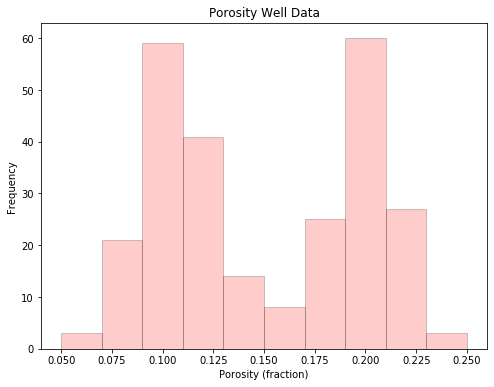

In [15]:
pormin = 0.05; pormax = 0.25
GSLIB.hist(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=10,weights = None, xlabel='Porosity (fraction)',title='Porosity Well Data',fig_name='hist_Porosity')

What's going on here? Looks quite bimodal. 

#### Histogram Bins, Number of Bins and Bin Size

Let's explore with a few bins sizes to check the impact on the histogram.

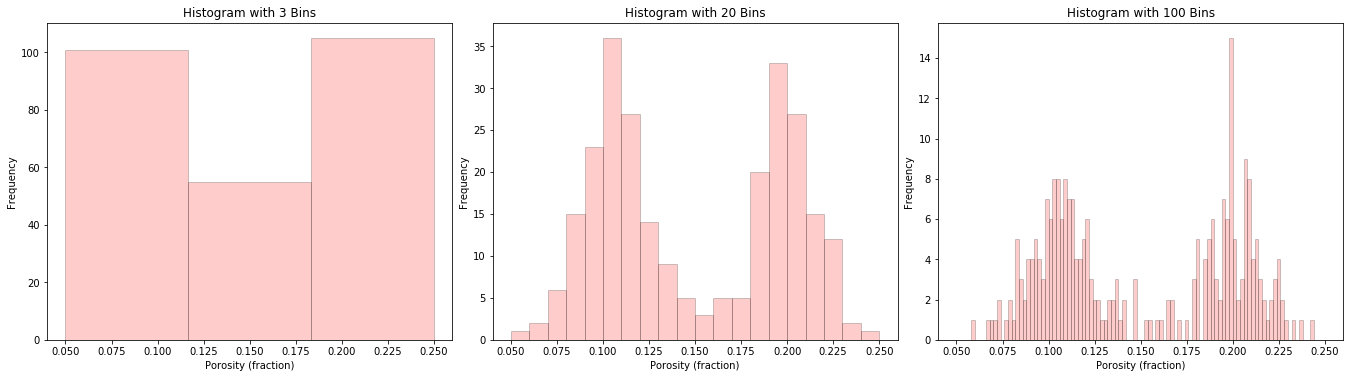

In [16]:
nbin1 = 3; nbin2 = 20; nbin3 = 100

plt.subplot(131)
GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=nbin1,weights = None,xlabel='Porosity (fraction)',title='Histogram with ' + str(nbin1) + ' Bins')

plt.subplot(132)
GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=nbin2,weights = None,xlabel='Porosity (fraction)',title='Histogram with ' + str(nbin2) + ' Bins')

plt.subplot(133)
GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=nbin3,weights = None,xlabel='Porosity (fraction)',title='Histogram with ' + str(nbin3) + ' Bins')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.1, hspace=0.2)
plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

See what happens when we use:

* **too large bins / too few bins** - often smooth out, removes information
* **too small bins / too many bins** - often too noisy, obscures information  

#### Plotting a Histogram with the matplotlib Package

I don't want to suggest that matplotlib is hard to use. The GSLIB visualizations provide convenience and once again use the same parameters as the GSLIB methods. Particularly, the 'hist' function is pretty easy to use, just a lot more code to write.  

* here's how we can make the same histogram as above with matplotlib directly

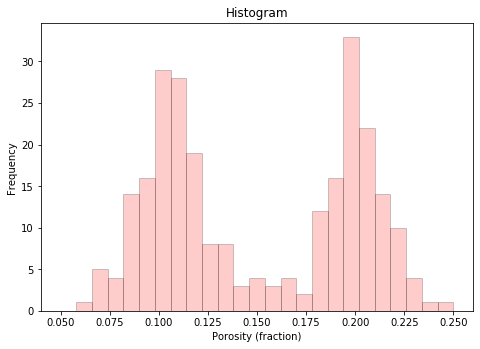

In [17]:
plt.hist(df['Porosity'].values,alpha=0.2,color="red",edgecolor="black",bins=25,range=[pormin,pormax])
plt.title('Histogram'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Frequency")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.2); plt.show()

Now we can demonstrate normalized histograms with matplotlib. 

* I didn't add this functionality to GeostatsPy's hist function

#### Normalized Histograms

Normalized histograms are convienient since we can read propability to be in each bin and observe closure by summing the probability for all bins is 1.0.

* to do this we need to explicity set the weight for each data as $\frac{1}{n}$

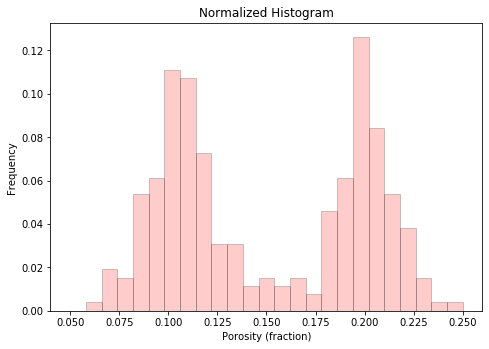

In [18]:
weights = np.ones(len(df)) / len(df)
plt.hist(df['Porosity'].values,alpha=0.2,color="red",edgecolor="black",bins=25,range=[pormin,pormax],weights=weights)
plt.title('Normalized Histogram'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Frequency")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.2)
plt.show()

#### Probability Density Functions

The practical way to calculate a probability density function (PDF) from data is to use of kernel density estimate (KDE).

* we place a kernel, in this case a parametric Gaussian PDF, at each data value and then calculate the sum of all data kernels.
* constrained for closure such that the area under the curve is 1.0.
* differentiating the data CDF is usually too noisy to be useful.

To demonstrate the KDE method, we calculate the KDE PDF for the first 2, 5, ..., 200 data. 

* when there are very few data you can see the individual Gaussian kernels
* with more data they start to smooth out

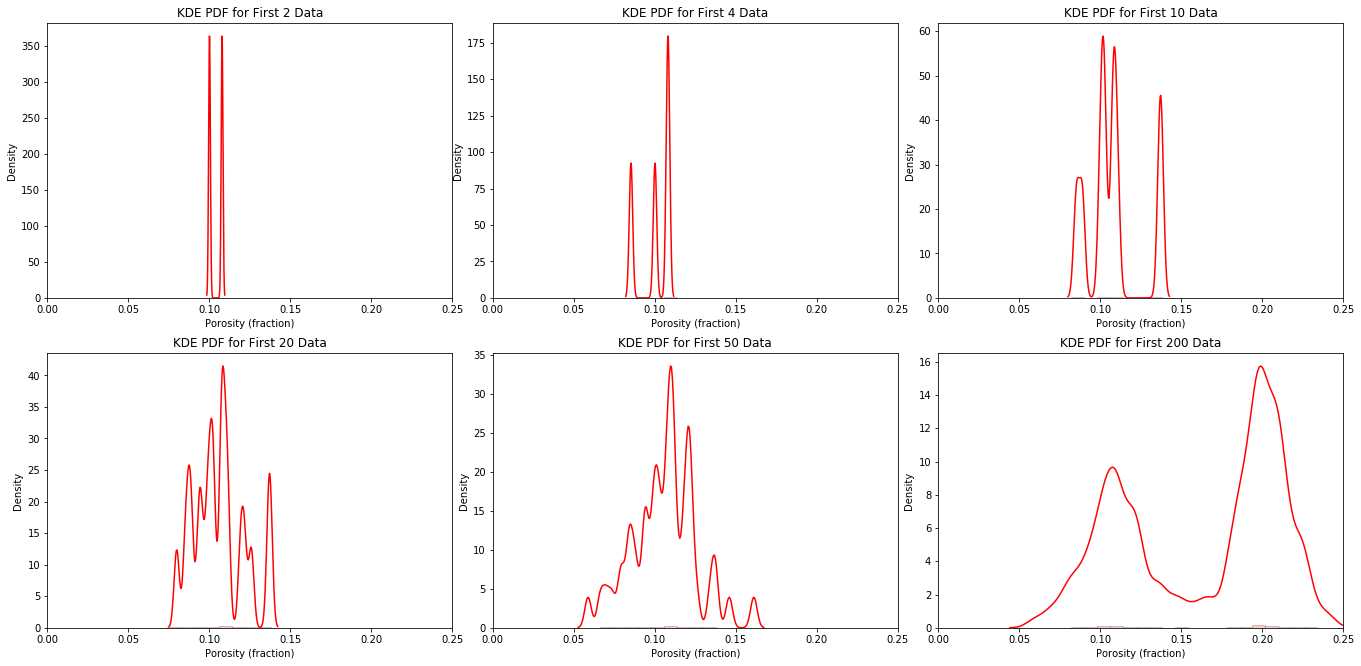

In [19]:
nums=[2,4,10,20,50,200]

for i, num in enumerate(nums):
    plt.subplot(2,3,i+1)
    plt.hist(df['Porosity'].values[:num],alpha=0.2,color="red",edgecolor="black",bins=25,range=[pormin,pormax],weights=np.ones(num)/num)
    sns.kdeplot(x=df['Porosity'].values[:num],color = 'red',alpha = 0.8,bw_method=0.1,)
    plt.xlim([0,0.25])
    plt.title('KDE PDF for First ' + str(num) + ' Data'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Density")
#plt.ylim([0,1])
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=2.1, wspace=0.1, hspace=0.2)
plt.show()

Now we can use the Seaborn package to calculate and plot the PDF from our data.

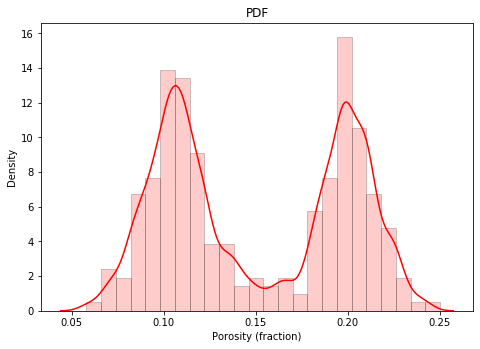

In [20]:
plt.hist(df['Porosity'].values,alpha=0.2,color="red",edgecolor="black",bins=25,range=[pormin,pormax],density=True)
sns.kdeplot(x=df['Porosity'].values,color = 'red',alpha = 0.8,bw_method=0.1)
plt.title('PDF'); plt.xlabel('Porosity (fraction)'); plt.ylabel("Density")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.2)
plt.show()

#### Cumulative Distribution Functions

This method in GeostatsPy makes a cumulative histogram, but the axis remains in frequency. 

* to be a true cumulative distribution function we would need to standardize the Y-axis to be from 0.0 to 1.0.
* we could call this a cumulative histogram

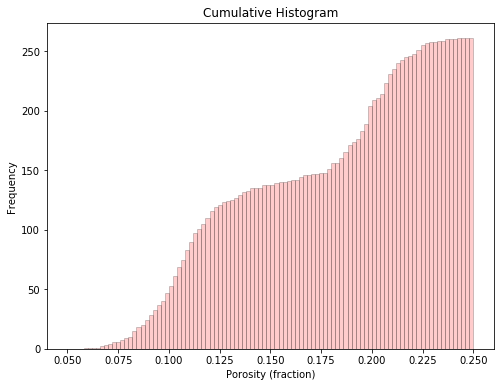

In [21]:
GSLIB.hist(df['Porosity'].values,pormin,pormax,log=False,cumul = True,bins=100,weights = None,xlabel='Porosity (fraction)',title='Cumulative Histogram',fig_name='hist_Porosity_CDF')

Here's how we can make a CDF with matplotlib.  

* the y axis is cumulative probability with a minimum of 0.0 and maximum of 1.0 as expected for a CDF.
* note after the initial hist command we can add a variety of elements such as labels to our plot as shown below.

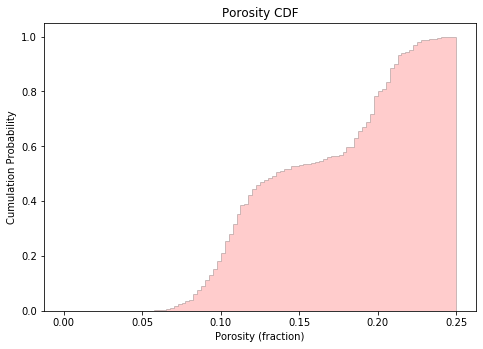

In [22]:
plt.hist(df['Porosity'].values,density=True, cumulative=True, label='CDF',
           histtype='stepfilled', alpha=0.2, bins = 100, color='red', edgecolor = 'black', range=[0.0,0.25])
plt.xlabel('Porosity (fraction)')
plt.title('Porosity CDF')
plt.ylabel('Cumulation Probability')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.2)
plt.savefig('cdf_Porosity.tif',dpi=600,bbox_inches="tight")
plt.show()

#### Calculating and Plotting a CDF by Hand

Let's demonstrate the calculation and plotting of a non-parametric CDF by hand

1. make a copy of the feature as a 1D array (ndarray from NumPy)
2. sort the data in ascending order
3. assign cumulative probabilities based on the tail assumptions
4. plot cumuative probability vs. value

The ndarray has a shape of (261,).


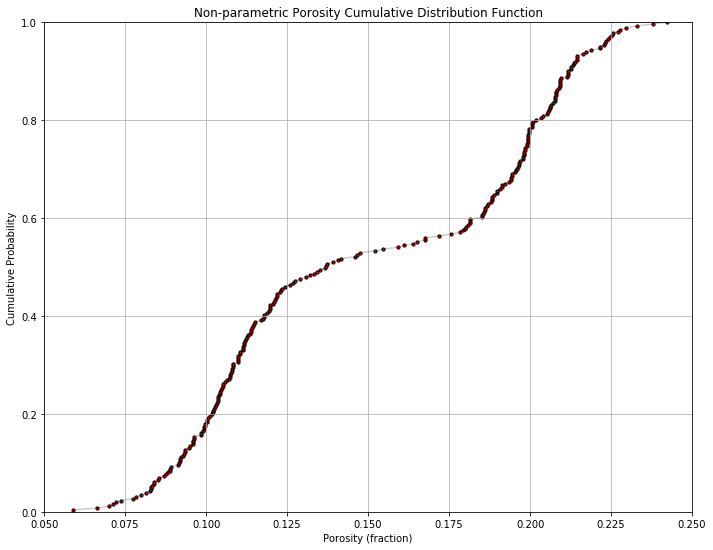

In [23]:
por = df['Porosity'].copy(deep = True).values # make a deepcopy of the feature from the DataFrame
print('The ndarray has a shape of ' + str(por.shape) + '.')

por = np.sort(por)                           # sort the data in ascending order
n = por.shape[0]                             # get the number of data samples

cprob = np.zeros(n)
for i in range(0,n):
    index = i + 1
    cprob[i] = index / n                     # known upper tail
    # cprob[i] = (index - 1)/n               # known lower tail
    # cprob[i] = (index - 1)/(n - 1)         # known upper and lower tails
    # cprob[i] = index/(n+1)                 # unknown tails  

plt.subplot(111)
plt.plot(por,cprob, alpha = 0.2, c = 'black') # plot piecewise linear interpolation
plt.scatter(por,cprob,s = 10, alpha = 1.0, c = 'red', edgecolor = 'black') # plot the CDF points
plt.grid(); plt.xlim([0.05,0.25]); plt.ylim([0.0,1.0])
plt.xlabel("Porosity (fraction)"); plt.ylabel("Cumulative Probability"); plt.title("Non-parametric Porosity Cumulative Distribution Function")

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.1, hspace=0.2)
plt.show()

In conclusion, let's finish with the histograms of all of our features!

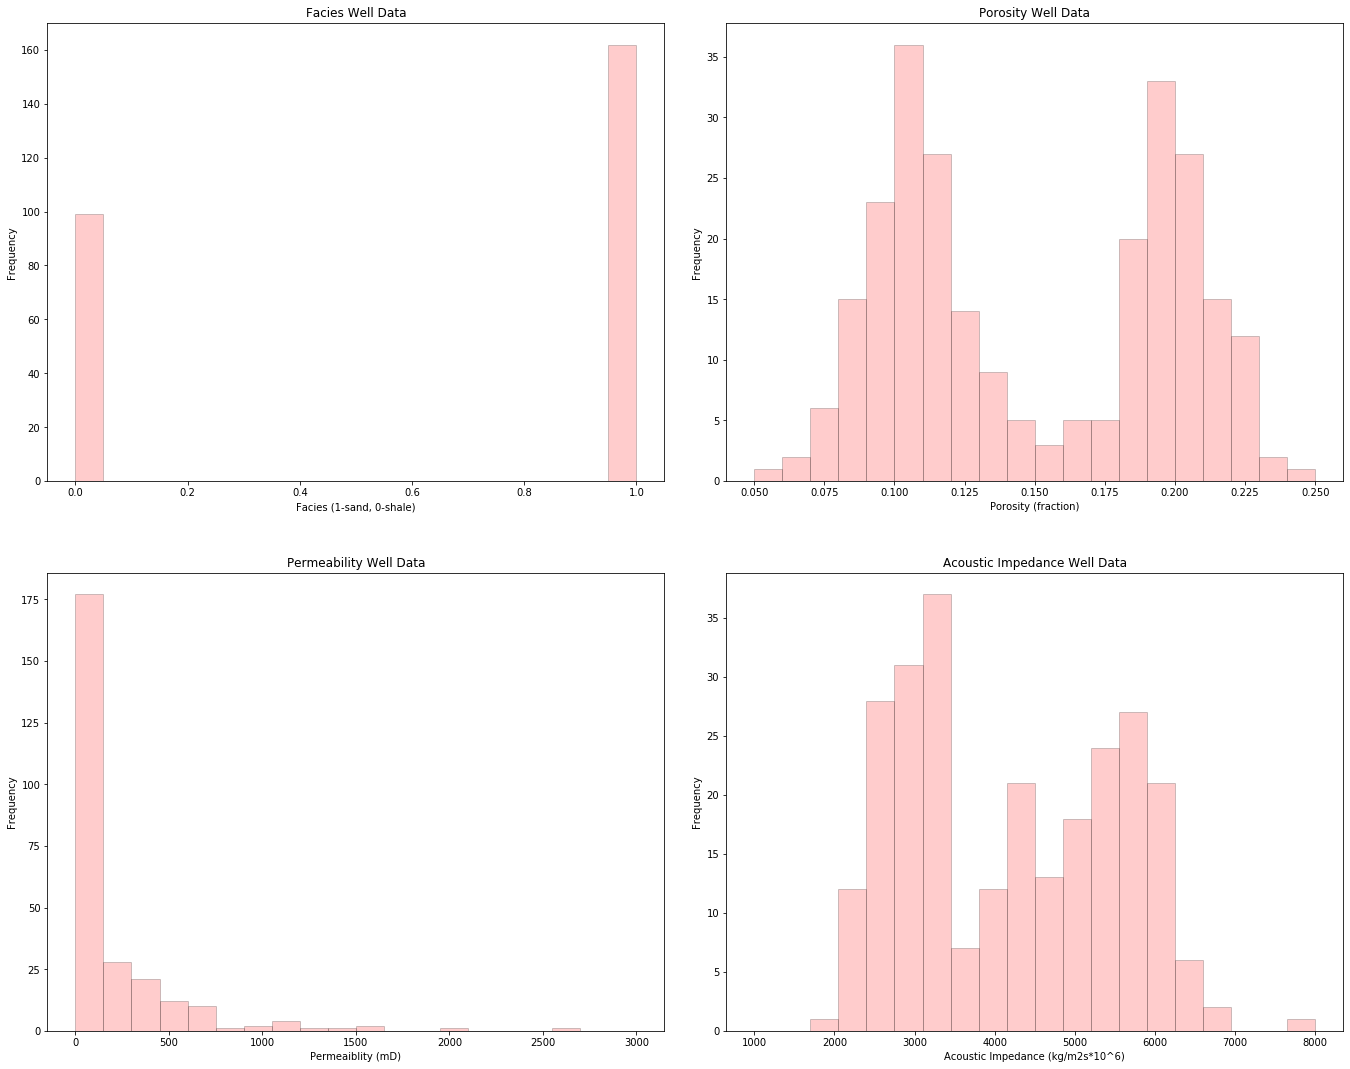

In [24]:
permmin = 0.01; permmax = 3000;                # user specified min and max
AImin = 1000.0; AImax = 8000
Fmin = 0; Fmax = 1

plt.subplot(221)
GSLIB.hist_st(df['Facies'].values,Fmin,Fmax,log=False,cumul = False,bins=20,weights = None,xlabel='Facies (1-sand, 0-shale)',title='Facies Well Data')

plt.subplot(222)
GSLIB.hist_st(df['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=20,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(223)
GSLIB.hist_st(df['Perm'].values,permmin,permmax,log=False,cumul = False,bins=20,weights = None,xlabel='Permeaiblity (mD)',title='Permeability Well Data')

plt.subplot(224)
GSLIB.hist_st(df['AI'].values,AImin,AImax,log=False,cumul = False,bins=20,weights = None,xlabel='Acoustic Impedance (kg/m2s*10^6)',title='Acoustic Impedance Well Data')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.5, wspace=0.1, hspace=0.2)
plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

#### Comments

This was a basic demonstration of calculating univariate statistics and visualizing data distributions. Much more could be done, I have other demosntrations on basics of working with DataFrames, ndarrays and many other workflows availble at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy.

I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
